<img src="https://github.com/DerekMazino/Inteligencia-Artificial/blob/main/Proyecto-Final-IA/Imgs/Banner.png?raw=true">

# **Proyecto Final: Detección de Emociones**

## **Integrantes**

1. Angie Natalia Arías Gómez - 2172017
2. Andrea Sofia Jaimes Alquichire - 2172716
3. Juan Camilo Marín García - 2172969

In [ ]:
#@title 1. MONTAR EL DRIVE  { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/UIS/IA/Proyecto-Final-IA/')

#print(os.getcwd())
#!chmod 777 convert_ipynb.sh run utils/* '''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title 2. Cargar Librerias  { display-mode: "form" }
import cv2, glob, random, math, numpy as np, dlib
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

## **Paso 1** : Cargar y presentar una imagen

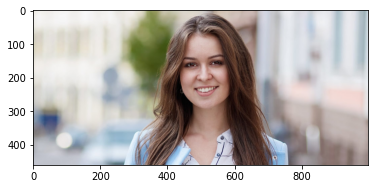

True

In [ ]:
#Usamos imread para cargar la imagen a procesar desde su ruta
img = cv2.imread("dataset/Intro.jpg")
#Con ctv podemos convertir la imagen de un espacio de color a otro
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Mostramos la imagen por medio de un plot
plt.imshow(img)
plt.show()
cv2.imwrite('sample1_output.jpg', img)

## **Paso 2** : Reconocimiento facial

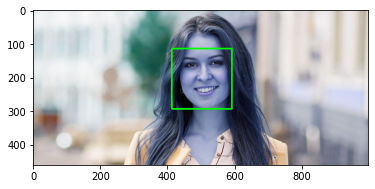

True

In [ ]:
#Convertimos la imagen a escalada de grises
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
#Usamos get_frontal_face_detector() para obtener un detectos de rostros
detector = dlib.get_frontal_face_detector()
#usamos el detector, eviandole la imagen en escala de grises
faces = detector(gray)
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point
    # Draw a rectangle
    cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=4)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(gray)
#plt.savefig("prueba00")
plt.show()
cv2.imwrite('sample2_output.jpg', gray)

## **Paso 3** : Identificación de las características faciales
<img src="Imgs/Banner.png">

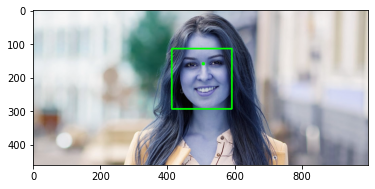

In [ ]:
#Cargamos el predictor, para ello usamos un modelo ya creado que detecta las marcas faciales 
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Look for the landmarks
    landmarks = predictor(image=gray, box=face)
    x = landmarks.part(27).x
    y = landmarks.part(27).y

    # Draw a circle
    cv2.circle(img=img, center=(x, y), radius=5, color=(0, 255, 0), thickness=-1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#plt.savefig("prueba00")
plt.show()

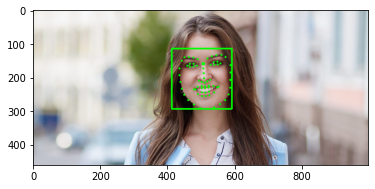

True

In [ ]:
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Create landmark object
    landmarks = predictor(image=gray, box=face)

    # Loop through all the points
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        # Draw a circle
        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#plt.savefig("prueba00")
plt.show()
cv2.imwrite('sample3_output.jpg', img)

In [ ]:
#@title 3. xxxx  { display-mode: "form" }
#Creamos una lista con los sentimientos con los que vamos a clasificar
emociones = ["feliz", "miedo", "neutral", "tristeza"]
#Crear un puntero inteligente
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#get_frontal_face_detector() se usa para detectar donde hay un rostro
detector = dlib.get_frontal_face_detector()
#Shape predictor buscar en la imagen un conjunto de ubicaciones dentro de ella
#Viene con un modelo ya entrenado para buscar marcas faciales
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #archivo de marcas faciales


In [ ]:
#@title 3. Cargando las imagenes que usaremos  { display-mode: "form" }

def get_files(emotion):
  #Usamos glob.glob para cargar una lista con las rutas de cada archivo
  #Se busca en la carpeta segín la emoción buscada
  files = glob.glob("dataset/%s/*" %emotion)
  #Revolvemos los archivos
  random.shuffle(files)
  #Cargamos trainig con todas las imagenes 
  training = files[:int(len(files))]
  #Predicción será la imagene que queremos analizar
  prediction=['dataset/1.png'] 
  return training, prediction

In [ ]:
#@title 4. Cargando las imagenes que usaremos  { display-mode: "form" }
def get_landmarks(image):
  #Detectamos el rostro de la persona
  detections = detector(image, 1)
  #Para todas las cara detectadas de forma individual
  for k,d in enumerate(detections): 
    shape = predictor(image, d) 
    xlist = []
    ylist = []
    #Guarda coordenadas X e Y en dos listas
    for i in range(1,68):
      xlist.append(float(shape.part(i).x))
      ylist.append(float(shape.part(i).y))
  
    xmean = np.mean(xlist) # Obtiene la media de ambos ejes para determinar el centro de gravedad
    ymean = np.mean(ylist)
    xcentral = [(x-xmean) for x in xlist] #calcula distancia entre cada punto y el punto central en ambos ejes
    ycentral = [(y-ymean) for y in ylist]
 

    # Si la coordenada x del conjunto son las mismas, el ángulo es 0,  evitamos el error 'divide by 0' en la función
    if xlist[26] == xlist[29]: 
      anglenose = 0
    else:
      anglenose = int(math.atan((ylist[26]-ylist[29])/(xlist[26]-xlist[29]))*180/math.pi)
 
    if anglenose < 0:
      anglenose += 90
    else:
      anglenose -= 90
 
    landmarks_vectorised = []
    for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
      landmarks_vectorised.append(x)
      landmarks_vectorised.append(y)
      meannp = np.asarray((ymean,xmean))
      coornp = np.asarray((z,w))
      dist = np.linalg.norm(coornp-meannp)
      anglerelative = (math.atan((z-ymean)/(w-xmean))*180/math.pi) - anglenose
      landmarks_vectorised.append(dist)
      landmarks_vectorised.append(anglerelative)
 
  if len(detections) < 1: 
    landmarks_vectorised = "error"
  return landmarks_vectorised

In [ ]:
def make_sets():
  training_data = []
  training_labels = []
  prediction_data = []
  prediction_labels = []
  training = []
  prediction = []
  #Se recorre la lista de emociones 
  for emotion in emotions:
      #Obtenemos la lista de imagenes para entrenar y la imagen a evaluar
      training, prediction = get_files(emotion)
      #Append data to training and prediction list, and generate labels 0-7
      for item in training:
          #imread recibe la ruta de la imagen y la abre
          image = cv2.imread(item)
          #convertimos a escala de grises
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
          clahe_image = clahe.apply(gray)
          landmarks_vectorised = get_landmarks(clahe_image)
          if landmarks_vectorised == "error":
              pass
          else:
             training_data.append(landmarks_vectorised) # vector de imágenes a la lista de datos de entrenamiento
             training_labels.append(emotions.index(emotion))
  
      for item in prediction:
          image = cv2.imread(item)
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          clahe_image = clahe.apply(gray)
          landmarks_vectorised = get_landmarks(clahe_image)
          if landmarks_vectorised == "error":
              pass
          else:
             prediction_data.append(landmarks_vectorised)
             prediction_labels.append(emotions.index(emotion))
 
  return training_data, training_labels, prediction_data, prediction_labels

In [ ]:
probam1 = np.zeros((4,10))
probam2 = np.zeros((1,4))
 
accur_lin = []
 
for i in range(0,10):
  print("Making sets %s" %i) #hace un muestreo aleatorio 80/20%
  training_data, training_labels, prediction_data, prediction_labels = make_sets()
  npar_train = np.array(training_data) #gira el conjunto de entrenamiento en una matriz numpy para el clasificador
  npar_trainlabs = np.array(training_labels)
  print("training SVM linear %s" %i) #entrenamiento SVM
  clf.fit(npar_train, training_labels)
 
  print("getting accuracies %s" %i) #Utilice la función score () para obtener mayor precisión
  npar_pred = np.array(prediction_data)
  pred_lin = clf.score(npar_pred, prediction_labels)
  print ("linear: ", pred_lin)
  accur_lin.append(pred_lin) #guarda la precision en una lista
  proba=clf.predict_proba(prediction_data)
  print ("proba: ", proba)
  probam1[:,i]=proba[1,:]
  probam2=proba[1,:]+probam2
  #probam(:,i)=probam+proba
 
  
proba=probam2/10 
p1=round(proba[0,0],2)
p2=round(proba[0,1],2)
p3=round(proba[0,2],2)
p4=round(proba[0,3],2)
print("Mean value lin svm: %.3f" %np.mean(accur_lin)) #hacemos 10 ejecuciones para aumentar precision
 
frame=cv2.imread('dataset/1.png') #aqui se añade la imagen que quieres procesar pero aqui solo se carga para el resultado final
#ploteamos el resultado
cv2.putText(frame, "Miedo: {}".format(p1), (10, 30),
 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2.putText(frame, "Feliz: {:.2f}".format(p2), (10, 60),
 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2.putText(frame, "Neutral: {}".format(p3), (10, 90),
 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2.putText(frame, "Triste: {:.2f}".format(p4), (10, 120),
 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
  

plt.imshow(frame)
plt.savefig("prueba0")
plt.show()

Making sets 0
training SVM linear 0
getting accuracies 0
linear:  0.25
proba:  [[0.27267336 0.05847758 0.42725812 0.24159093]
 [0.27267336 0.05847758 0.42725812 0.24159093]
 [0.27267336 0.05847758 0.42725812 0.24159093]
 [0.27267336 0.05847758 0.42725812 0.24159093]]
Making sets 1
training SVM linear 1
getting accuracies 1
linear:  0.25
proba:  [[0.29616317 0.06248791 0.30238241 0.33896651]
 [0.29616317 0.06248791 0.30238241 0.33896651]
 [0.29616317 0.06248791 0.30238241 0.33896651]
 [0.29616317 0.06248791 0.30238241 0.33896651]]
Making sets 2


KeyboardInterrupt: ignored

In [ ]:
probam3 = np.zeros((4,10))
probam4 = np.zeros((1,4))
probam3
#probam4

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# **Pruebas Codigo Completo**

Making sets 0
training SVM linear 0
getting accuracies 0
linear:  0.25
proba:  [[0.26660644 0.06302638 0.4055271  0.26484008]
 [0.26660644 0.06302638 0.4055271  0.26484008]
 [0.26660644 0.06302638 0.4055271  0.26484008]
 [0.26660644 0.06302638 0.4055271  0.26484008]]
Making sets 1
training SVM linear 1
getting accuracies 1
linear:  0.25
proba:  [[0.28689086 0.05097667 0.42529026 0.23684221]
 [0.28689086 0.05097667 0.42529026 0.23684221]
 [0.28689086 0.05097667 0.42529026 0.23684221]
 [0.28689086 0.05097667 0.42529026 0.23684221]]
Making sets 2
training SVM linear 2
getting accuracies 2
linear:  0.25
proba:  [[0.28611479 0.05543837 0.44038884 0.21805799]
 [0.28611479 0.05543837 0.44038884 0.21805799]
 [0.28611479 0.05543837 0.44038884 0.21805799]
 [0.28611479 0.05543837 0.44038884 0.21805799]]
Making sets 3
training SVM linear 3
getting accuracies 3
linear:  0.25
proba:  [[0.26256441 0.04814596 0.44986188 0.23942775]
 [0.26256441 0.04814596 0.44986188 0.23942775]
 [0.26256441 0.04814596

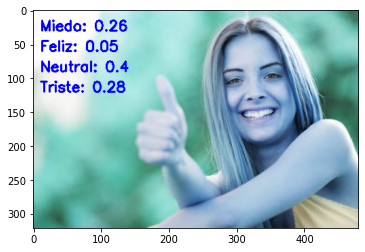

In [ ]:
import cv2, glob, random, math, numpy as np, dlib
from sklearn.svm import SVC
 
 
emotions = ["miedo", "feliz", "neutral", "tristeza"] #lista de sentimientos
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #archivo de marcas faciales
clf = SVC(kernel='linear', probability=True, tol=1e-3)#, verbose = True) #Establece el clasificador como un vector de apoyo de máquinas polinomial kernel
 
def get_files(emotion):
    files = glob.glob("dataset/%s/*" %emotion)
    random.shuffle(files)
    training = files[:int(len(files))]
    prediction=['dataset/1.png'] #aqui se añade la imagen que quieres procesar
    return training, prediction
 
def get_landmarks(image):
   detections = detector(image, 1)
   for k,d in enumerate(detections): #Para todas las cara detectadas de forma individual
      shape = predictor(image, d) 
      xlist = []
      ylist = []
      for i in range(1,68): #Guarda coordenadas X e Y en dos listas
          xlist.append(float(shape.part(i).x))
          ylist.append(float(shape.part(i).y))
  
      xmean = np.mean(xlist) # Obtiene la media de ambos ejes para determinar el centro de gravedad
      ymean = np.mean(ylist)
      xcentral = [(x-xmean) for x in xlist] #calcula distancia entre cada punto y el punto central en ambos ejes
      ycentral = [(y-ymean) for y in ylist]
 
      if xlist[26] == xlist[29]: # Si la coordenada x del conjunto son las mismas, el ángulo es 0,  evitamos el error 'divide by 0' en la función
          anglenose = 0
      else:
          anglenose = int(math.atan((ylist[26]-ylist[29])/(xlist[26]-xlist[29]))*180/math.pi)
 
      if anglenose < 0:
          anglenose += 90
      else:
          anglenose -= 90
 
      landmarks_vectorised = []
      for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
          landmarks_vectorised.append(x)
          landmarks_vectorised.append(y)
          meannp = np.asarray((ymean,xmean))
          coornp = np.asarray((z,w))
          dist = np.linalg.norm(coornp-meannp)
          anglerelative = (math.atan((z-ymean)/(w-xmean))*180/math.pi) - anglenose
          landmarks_vectorised.append(dist)
          landmarks_vectorised.append(anglerelative)
 
   if len(detections) < 1: 
       landmarks_vectorised = "error"
   return landmarks_vectorised
 
def make_sets():
  training_data = []
  training_labels = []
  prediction_data = []
  prediction_labels = []
  training = []
  prediction = []
  for emotion in emotions:
      training, prediction = get_files(emotion)
      #Append data to training and prediction list, and generate labels 0-7
      for item in training:
          image = cv2.imread(item) #open image
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convertimos a escala de grises
          clahe_image = clahe.apply(gray)
          landmarks_vectorised = get_landmarks(clahe_image)
          if landmarks_vectorised == "error":
              pass
          else:
             training_data.append(landmarks_vectorised) # vector de imágenes a la lista de datos de entrenamiento
             training_labels.append(emotions.index(emotion))
  
      for item in prediction:
          image = cv2.imread(item)
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          clahe_image = clahe.apply(gray)
          landmarks_vectorised = get_landmarks(clahe_image)
          if landmarks_vectorised == "error":
              pass
          else:
             prediction_data.append(landmarks_vectorised)
             prediction_labels.append(emotions.index(emotion))
 
  return training_data, training_labels, prediction_data, prediction_labels,
 
 
probam1 = np.zeros((4,10))
probam2 = np.zeros((1,4))
 
accur_lin = []
 
for i in range(0,10):
  print("Making sets %s" %i) #hace un muestreo aleatorio 80/20%
  training_data, training_labels, prediction_data, prediction_labels = make_sets()
  npar_train = np.array(training_data) #gira el conjunto de entrenamiento en una matriz numpy para el clasificador
  npar_trainlabs = np.array(training_labels)
  print("training SVM linear %s" %i) #entrenamiento SVM
  clf.fit(npar_train, training_labels)
 
  print("getting accuracies %s" %i) #Utilice la función score () para obtener mayor precisión
  npar_pred = np.array(prediction_data)
  pred_lin = clf.score(npar_pred, prediction_labels)
  print ("linear: ", pred_lin)
  accur_lin.append(pred_lin) #guarda la precision en una lista
  proba=clf.predict_proba(prediction_data)
  print ("proba: ", proba)
  probam1[:,i]=proba[1,:]
  probam2=proba[1,:]+probam2
  #probam(:,i)=probam+proba
 
  
proba=probam2/10 
p1=round(proba[0,0],2)
p2=round(proba[0,1],2)
p3=round(proba[0,2],2)
p4=round(proba[0,3],2)
print("Mean value lin svm: %.3f" %np.mean(accur_lin)) #hacemos 10 ejecuciones para aumentar precision
 
frame=cv2.imread('dataset/1.png') #aqui se añade la imagen que quieres procesar pero aqui solo se carga para el resultado final
#ploteamos el resultado
cv2.putText(frame, "Miedo: {}".format(p1), (10, 30),
 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2.putText(frame, "Feliz: {:.2f}".format(p2), (10, 60),
 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2.putText(frame, "Neutral: {}".format(p3), (10, 90),
 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2.putText(frame, "Triste: {:.2f}".format(p4), (10, 120),
 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
  

plt.imshow(frame)
plt.savefig("prueba00")
plt.show()
# mostramos la imagen
#cv2.imshow("Frame", frame)
#cv2.imwrite('resultado.png',frame)
#cv2.waitKey(0)
#cv2.destroyAllWindows()